In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 25.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [3]:
df=pd.read_csv(path + '/CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
pd.set_option('display.max_columns',None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df=df.drop(['car_ID','CarName','stroke','compressionratio'],axis=1)

In [9]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106,4800,26,27,22470.0


In [10]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
symboling,-0.079978


In [11]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000,6600.000000,49.000000,54.000000,45400.000000


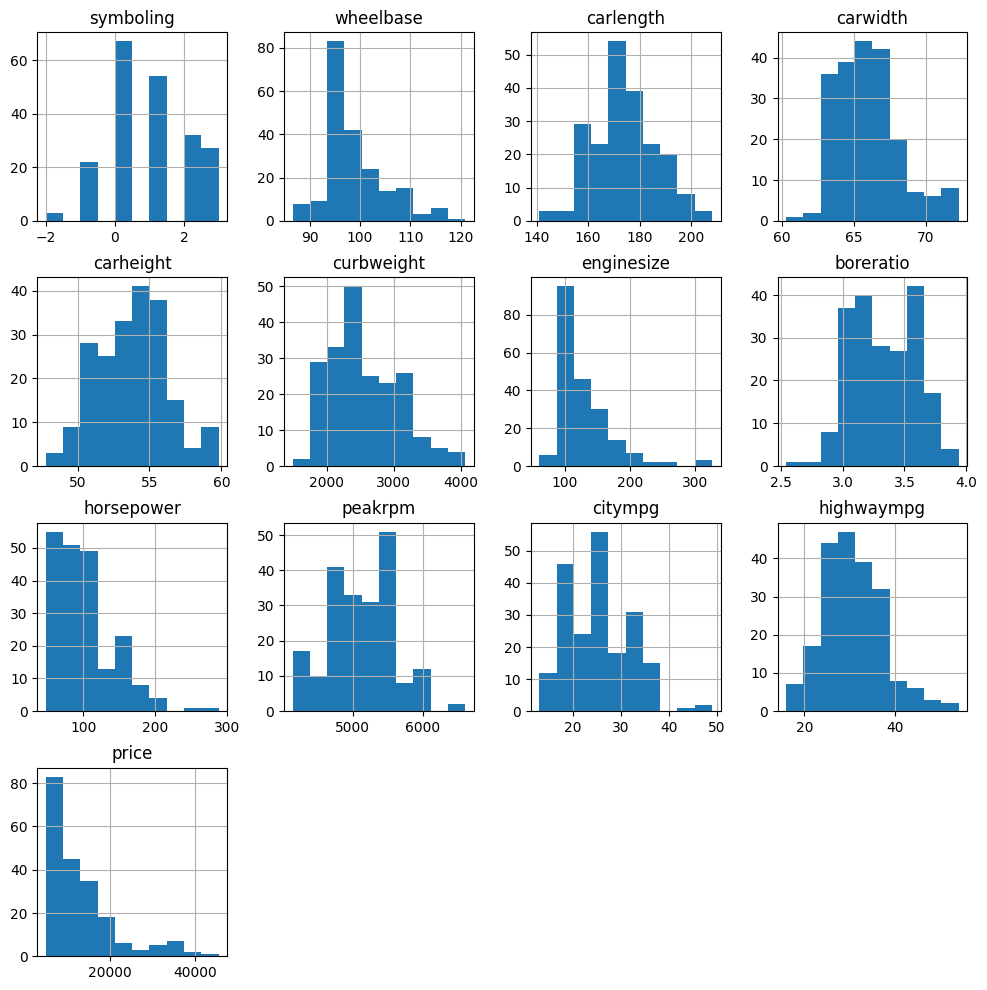

In [12]:
df.hist(figsize=(12,12));

In [13]:
if df['price'].isna().sum()>0:
  df=df.dropna(subset=['price'],inplace=True)

In [14]:
df.drop_duplicates()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106,4800,26,27,22470.0


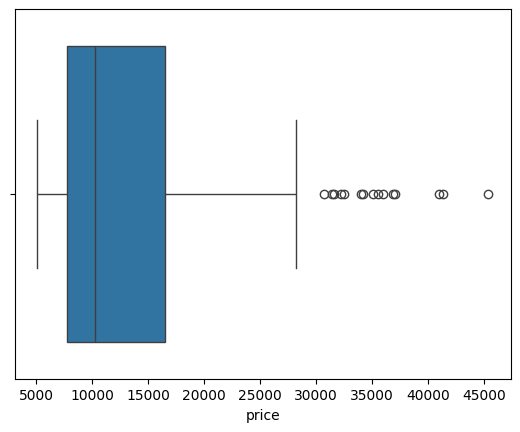

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['price'])
plt.show()

In [16]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['price']>=lower_bound) &(df['price']<=upper_bound)]

In [17]:
X=df.drop('price',axis=1)
y=df['price'].copy()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [20]:
num_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')

In [21]:
cat_features

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge

#LinearRegression

In [23]:
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

transformer=ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
],remainder='passthrough')

estimator=LinearRegression()

full_pipeline=Pipeline([
    ('preprocessing',transformer),
    ('ridge',Ridge(alpha=3))
    # ('estimator',estimator)
])

In [24]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('ridge', Ridge(alpha=3))])

In [25]:
full_pipeline.score(X_train,y_train)

0.8992967606231563

In [26]:
full_pipeline.score(X_test,y_test)

0.6853650203818753

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(full_pipeline, X_test, y_test, cv=5, scoring='r2')
scores

array([0.90974057, 0.70173444, 0.60723706, 0.50853203, 0.50117244])

In [28]:
scores.mean()

np.float64(0.645683309831932)

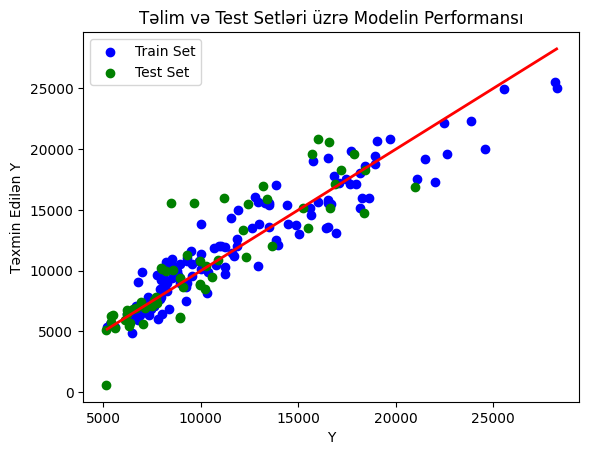

In [29]:
y_train_pred = full_pipeline.predict(X_train)
y_test_pred = full_pipeline.predict(X_test)

plt.scatter(y_train, y_train_pred, color='blue', label='Train Set')
plt.scatter(y_test, y_test_pred, color='green', label='Test Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Y')
plt.ylabel('Təxmin Edilən Y')
plt.legend()
plt.title('Təlim və Test Setləri üzrə Modelin Performansı')
plt.show()


In [30]:
model = full_pipeline.named_steps['ridge']
coefficients = model.coef_

In [31]:
coefficients

array([  595.06021925,   638.57364756,  -268.08238917,  1166.58628342,
         140.56028639,  1267.07566756,   242.56820982,   -85.04902864,
         779.29451566,    90.34915113,  -676.49684142,   586.85442924,
         309.05307728,  -309.05307728,  -662.47096827,   662.47096827,
         255.78146888,  -255.78146888,  1149.27652494,   858.02956286,
        -860.05076013,  -225.97123962,  -921.28408804,  -255.65056622,
       -1148.41916975,  1404.06973597,     0.        ,   779.46825041,
       -1315.7019079 ,  1297.57404682,   271.22037131,  -951.62567735,
         -80.9350833 ,   961.09380686, -1658.37436762,   778.21564405,
         -80.9350833 ,   662.80738479,   140.49307863,  -439.02106956,
         309.05307728,  -305.34420979,   662.17034286,  -703.54407493,
        -326.61452929])

In [32]:
coefficients = full_pipeline.named_steps['ridge'].coef_

In [33]:
coefficients

array([  595.06021925,   638.57364756,  -268.08238917,  1166.58628342,
         140.56028639,  1267.07566756,   242.56820982,   -85.04902864,
         779.29451566,    90.34915113,  -676.49684142,   586.85442924,
         309.05307728,  -309.05307728,  -662.47096827,   662.47096827,
         255.78146888,  -255.78146888,  1149.27652494,   858.02956286,
        -860.05076013,  -225.97123962,  -921.28408804,  -255.65056622,
       -1148.41916975,  1404.06973597,     0.        ,   779.46825041,
       -1315.7019079 ,  1297.57404682,   271.22037131,  -951.62567735,
         -80.9350833 ,   961.09380686, -1658.37436762,   778.21564405,
         -80.9350833 ,   662.80738479,   140.49307863,  -439.02106956,
         309.05307728,  -305.34420979,   662.17034286,  -703.54407493,
        -326.61452929])

In [34]:
feature_names = transformer.get_feature_names_out()

In [35]:
feature_names

array(['num__symboling', 'num__wheelbase', 'num__carlength',
       'num__carwidth', 'num__carheight', 'num__curbweight',
       'num__enginesize', 'num__boreratio', 'num__horsepower',
       'num__peakrpm', 'num__citympg', 'num__highwaympg',
       'cat__fueltype_diesel', 'cat__fueltype_gas', 'cat__aspiration_std',
       'cat__aspiration_turbo', 'cat__doornumber_four',
       'cat__doornumber_two', 'cat__carbody_convertible',
       'cat__carbody_hardtop', 'cat__carbody_hatchback',
       'cat__carbody_sedan', 'cat__carbody_wagon', 'cat__drivewheel_4wd',
       'cat__drivewheel_fwd', 'cat__drivewheel_rwd',
       'cat__enginelocation_front', 'cat__enginetype_dohc',
       'cat__enginetype_l', 'cat__enginetype_ohc', 'cat__enginetype_ohcf',
       'cat__enginetype_ohcv', 'cat__enginetype_rotor',
       'cat__cylindernumber_five', 'cat__cylindernumber_four',
       'cat__cylindernumber_six', 'cat__cylindernumber_two',
       'cat__fuelsystem_1bbl', 'cat__fuelsystem_2bbl',
       'cat__f

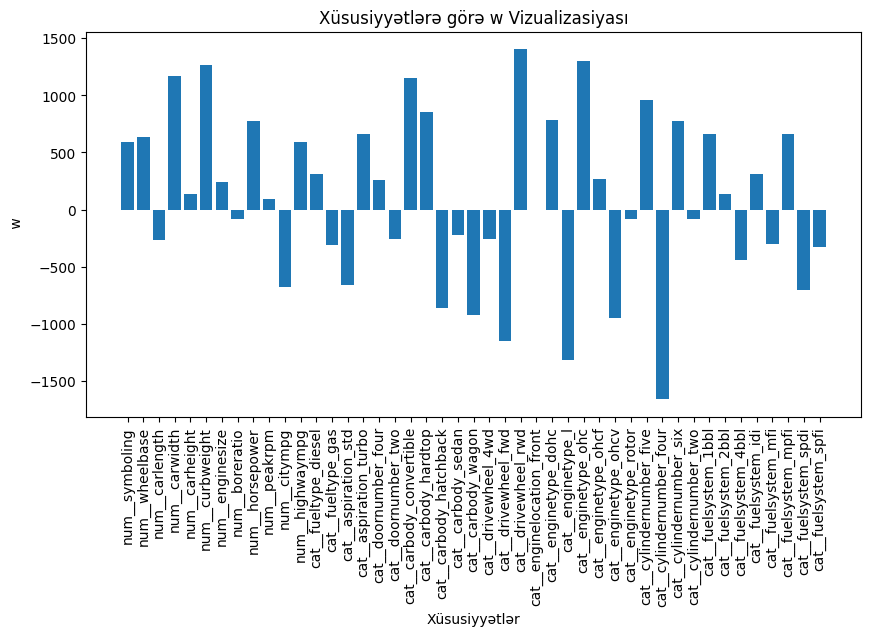

In [36]:

coef = model.coef_

plt.figure(figsize=(10,5))
plt.bar(feature_names, coef)
plt.xlabel('Xüsusiyyətlər')
plt.ylabel(' w')
plt.title('Xüsusiyyətlərə görə w Vizualizasiyası')
plt.xticks(rotation=90, fontsize=10)
plt.show()


#DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
estimator=DecisionTreeRegressor(max_depth=3,random_state=42)

In [77]:
full_pipeline=Pipeline([
    ('preprocessing',transformer),
    ('estimator',estimator)
])

In [78]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='objec...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('estimator',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

In [79]:
full_pipeline.score(X_train,y_train)

0.853772529297879

In [80]:
full_pipeline.score(X_test,y_test)

0.6807938441322051

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'estimator__max_depth':[4,6,8],
    'estimator__min_samples_split':[8,10,12],
    'estimator__min_samples_leaf':[5,7,8]
}

grid_search=GridSearchCV(full_pipeline,param_grid,cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'citympg...
                                                                                                        sparse_output=False))]),
                                                                         Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                                       ('estimator',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             param_grid={'estimator__max_depth': [4, 6, 8],
                         'estimator__min_samples_leaf': [5, 7, 8],
                         'estimator__min_samples_split': [8, 10, 12]})

In [82]:
grid_search.best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='objec...
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object'))])),
                ('estimator',
                 DecisionTreeRegressor(max_depth=4, min_samples_leaf=5,
                                       min_samples_split=8, random_state=42))])

In [83]:
grid_search.score(X_train,y_train)

0.882849063941021

In [84]:
grid_search.score(X_test,y_test)

0.7988514377713422

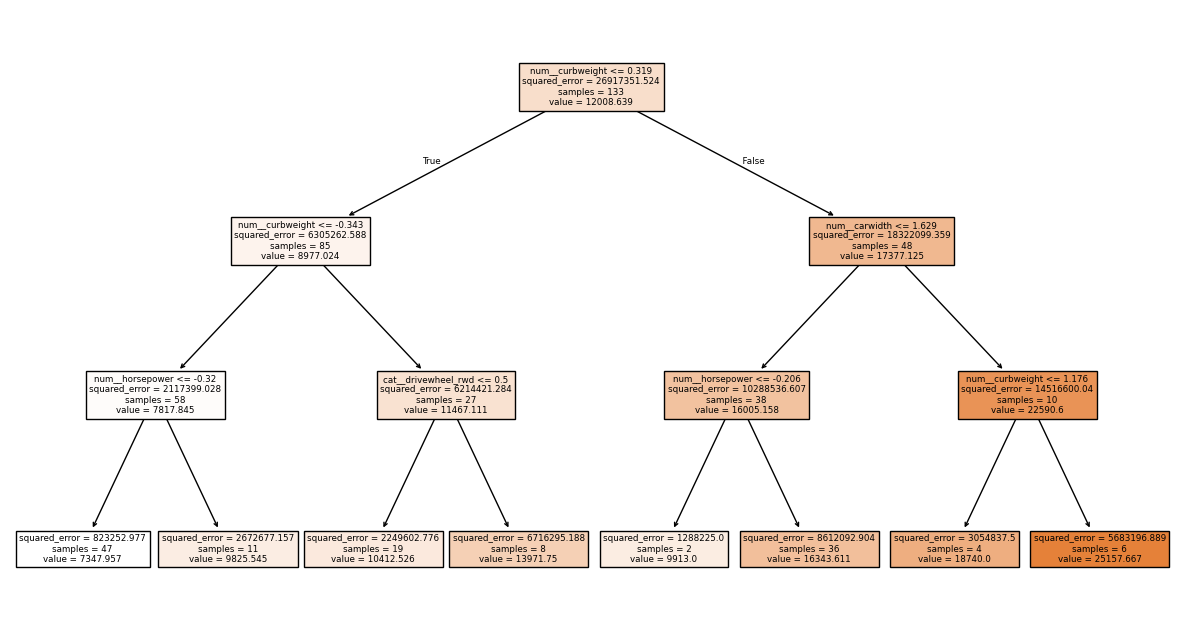

In [85]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
tree.plot_tree(estimator, filled=True, feature_names=feature_names)
plt.show()
